# Análisis Exploratorio de Datos de Tweets

Este notebook realiza un análisis exploratorio de datos (EDA) de un dataset de tweets. El dataset contiene información variada sobre tweets, incluyendo el contenido, usuario, fecha y métricas de interacción. A continuación, se describen los pasos del análisis. Luego se procedera a la implementación de las funciones descritas en ENUNCIADO.md. Cabe destacar que las funciones implementadas fueron verificadas bajo la metodología descrita en la sección 'Mediciones' del notebook presente, la cual se encuentra al final de este.

## 1. Importación de las bibliotecas necesarias

Primero, importamos las bibliotecas necesarias para la manipulación y visualización de datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from memory_profiler import memory_usage
from q1_memory import q1_memory
from q1_time import q1_time
from q2_memory import q2_memory
from q2_time import q2_time
from q3_memory import q3_memory
from q3_time import q3_time

# Configuración de opciones de visualización
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
sns.set(style="whitegrid")

## 2. Carga del archivo JSON

Leemos el archivo JSON que contiene los datos de los tweets y lo cargamos en un DataFrame de pandas.

In [2]:
# Cargar el archivo JSON
file_path = "farmers-protest-tweets-2021-2-4.json"  # Cambiar por la ruta real de tu archivo
df = pd.read_json(file_path, lines=True)

## 3. Inspección básica del DataFrame

Realizamos una inspección básica del DataFrame para entender su estructura y contenido.

In [3]:
print("Dimensiones del DataFrame:")
print(df.shape)

print("\nPrimeras filas del DataFrame:")
print(df.head())

print("\nInformación general del DataFrame:")
print(df.info())

print("\nDescripción estadística del DataFrame:")
print(df.describe())

Dimensiones del DataFrame:
(117407, 21)

Primeras filas del DataFrame:
                                                 url  \
0  https://twitter.com/ArjunSinghPanam/status/136...   
1  https://twitter.com/PrdeepNain/status/13645062...   
2  https://twitter.com/parmarmaninder/status/1364...   
3  https://twitter.com/anmoldhaliwal/status/13645...   
4  https://twitter.com/KotiaPreet/status/13645061...   

                       date  \
0 2021-02-24 09:23:35+00:00   
1 2021-02-24 09:23:32+00:00   
2 2021-02-24 09:23:22+00:00   
3 2021-02-24 09:23:16+00:00   
4 2021-02-24 09:23:10+00:00   

                                             content  \
0  The world progresses while the Indian police a...   
1  #FarmersProtest \n#ModiIgnoringFarmersDeaths \...   
2  ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇ...   
3  @ReallySwara @rohini_sgh watch full video here...   
4  #KisanEktaMorcha #FarmersProtest #NoFarmersNoF...   

                                     renderedContent                

## 4. Análisis de las columnas

Examinamos los nombres de las columnas del DataFrame para entender mejor qué datos están disponibles.

In [4]:
print("\nNombres de las columnas del DataFrame:")
print(df.columns)


Nombres de las columnas del DataFrame:
Index(['url', 'date', 'content', 'renderedContent', 'id', 'user', 'outlinks',
       'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'media',
       'retweetedTweet', 'quotedTweet', 'mentionedUsers'],
      dtype='object')


## 5. Análisis de valores nulos

Identificamos y visualizamos los valores nulos en el DataFrame para planificar la limpieza de datos.


Conteo de valores nulos por columna:
url                     0
date                    0
content                 0
renderedContent         0
id                      0
                    ...  
sourceLabel           912
media               89298
retweetedTweet     117407
quotedTweet         75971
mentionedUsers      79373
Length: 21, dtype: int64


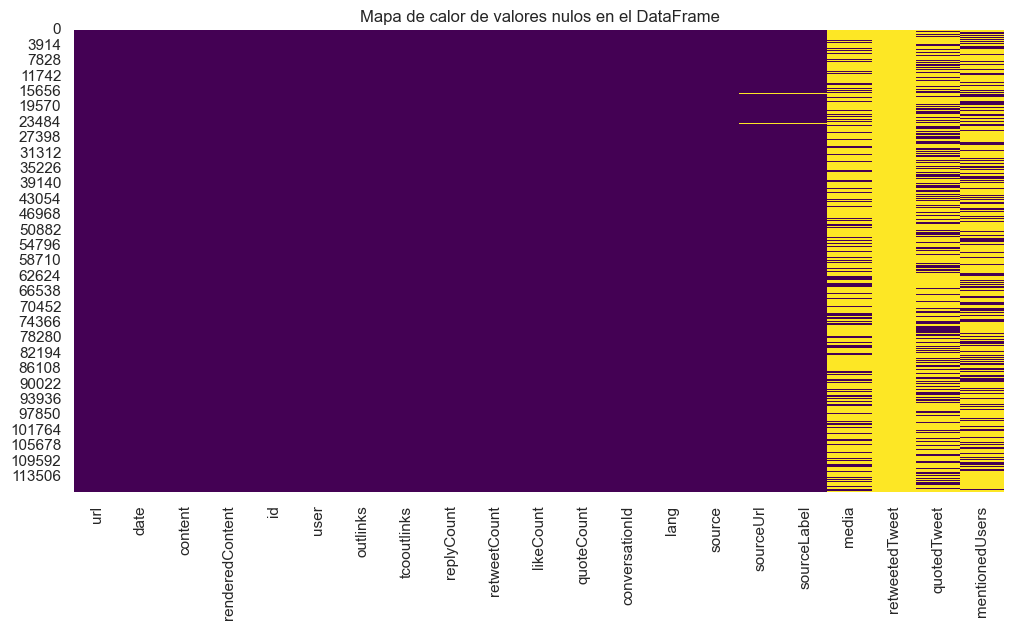

In [5]:
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

# Visualización de valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos en el DataFrame')
plt.show()

## 6. Manipulación/Limpieza de datos

Realizamos algunas operaciones básicas de limpieza de datos, como eliminar columnas con muchos valores nulos y rellenar valores nulos en columnas numéricas y categóricas.

In [6]:
# Eliminar columnas con una gran cantidad de valores nulos
df_cleaned = df.drop(columns=['retweetedTweet'])

# Rellenar valores nulos en columnas numéricas con la media
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

C:\Users\RBass\AppData\Local\Temp\ipykernel_12888\1482781990.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)


## 7. Análisis Exploratorio de Datos (EDA)

Realizamos varias visualizaciones para entender mejor la distribución de los datos y las relaciones entre diferentes variables.

### 7.1. Distribución de la cantidad de tweets por fecha

Visualizamos cómo varía la cantidad de tweets a lo largo del tiempo.

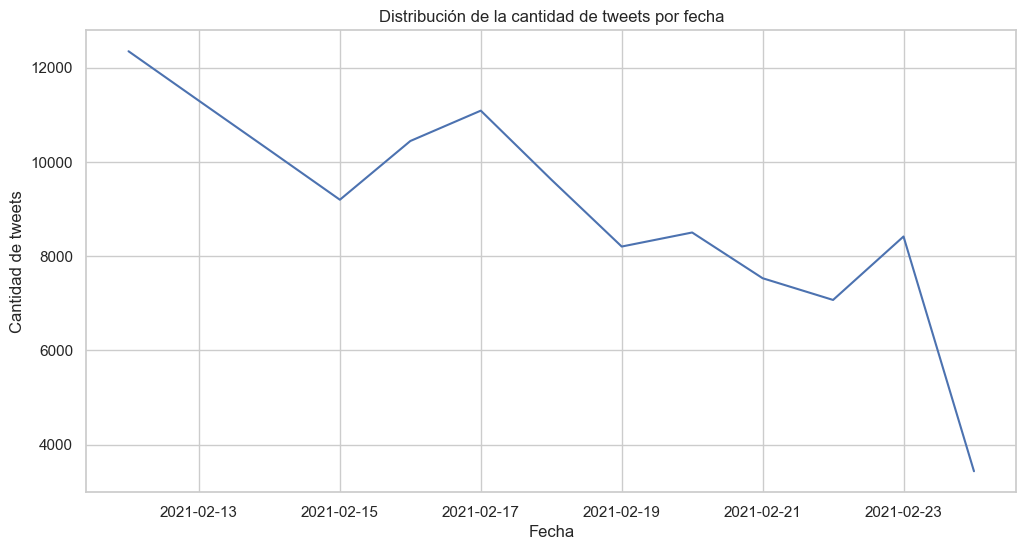

In [7]:
# Distribución de la cantidad de tweets por fecha
plt.figure(figsize=(12, 6))
df_cleaned['date'] = pd.to_datetime(df_cleaned['date']).dt.date
tweet_counts_by_date = df_cleaned['date'].value_counts().sort_index()
tweet_counts_by_date.plot(kind='line')
plt.title('Distribución de la cantidad de tweets por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de tweets')
plt.grid(True)
plt.show()

### 7.2. Distribución de la cantidad de likes

Examinamos la distribución de la cantidad de likes para entender la interacción con los tweets.

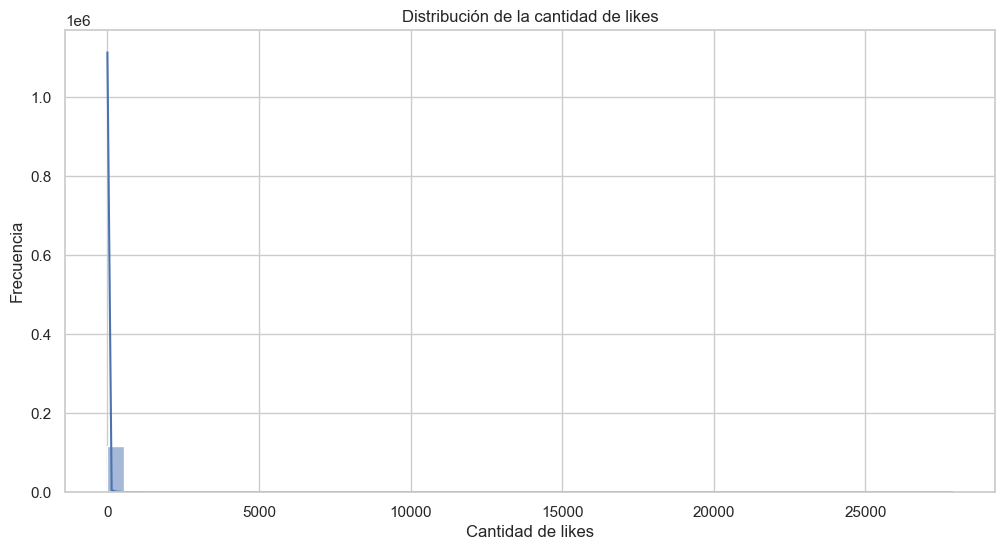

In [8]:
# Distribución de la cantidad de likes
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['likeCount'], bins=50, kde=True)
plt.title('Distribución de la cantidad de likes')
plt.xlabel('Cantidad de likes')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### 7.3. Usuarios más activos (top 10)

Identificamos los 10 usuarios más activos en el dataset.

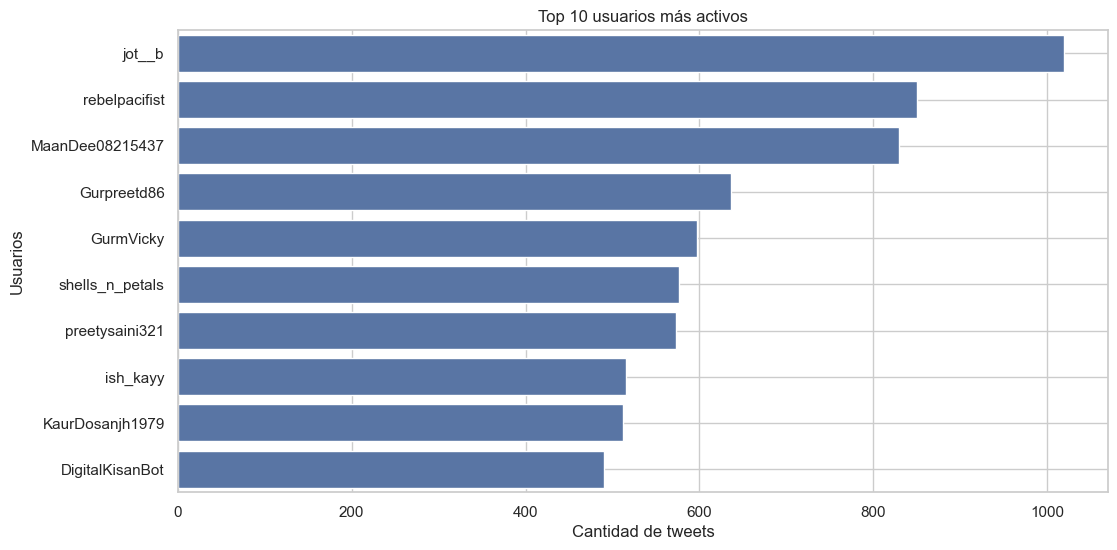

In [9]:
# Usuarios más activos (top 10)
df_cleaned['username'] = df_cleaned['user'].apply(lambda x: x['username'])
top_users = df_cleaned['username'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.values, y=top_users.index)
plt.title('Top 10 usuarios más activos')
plt.xlabel('Cantidad de tweets')
plt.ylabel('Usuarios')
plt.grid(True)
plt.show()

### 7.4. Análisis de las fuentes de los tweets

Examinamos las fuentes de los tweets para entender desde dónde se originan la mayoría de los tweets.

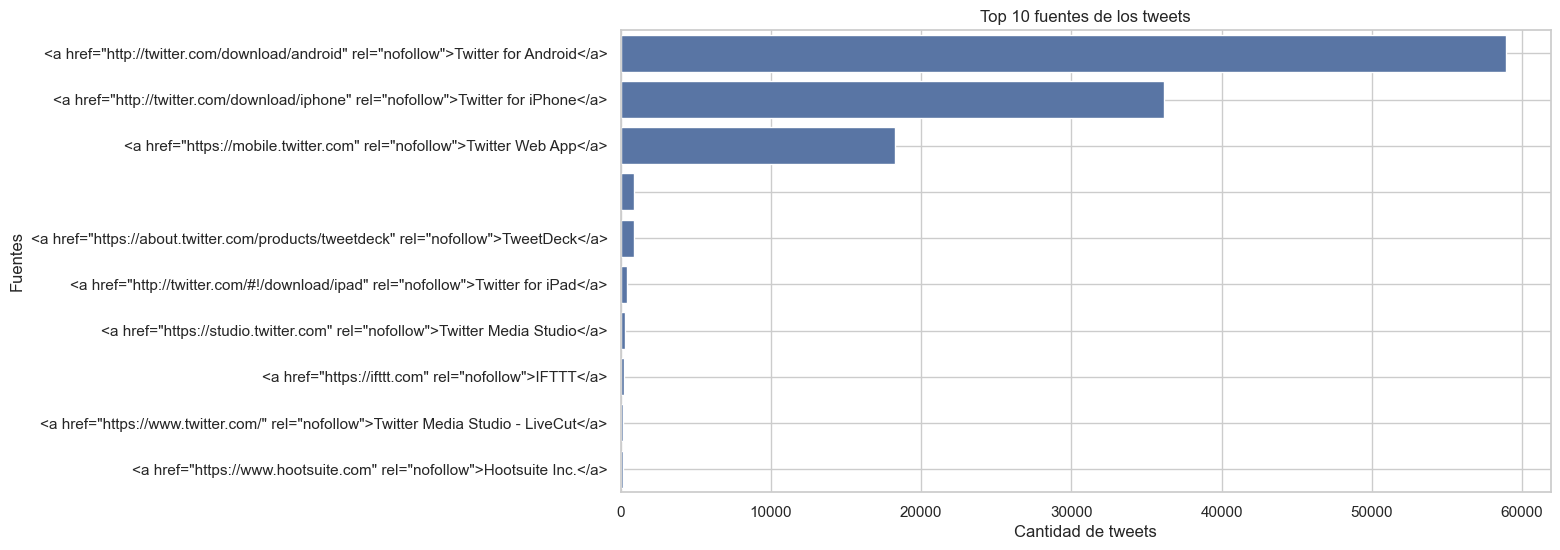

In [10]:
# Análisis de las fuentes de los tweets
plt.figure(figsize=(12, 6))
top_sources = df_cleaned['source'].value_counts().head(10)
sns.barplot(x=top_sources.values, y=top_sources.index)
plt.title('Top 10 fuentes de los tweets')
plt.xlabel('Cantidad de tweets')
plt.ylabel('Fuentes')
plt.grid(True)
plt.show()

## Conclusión

En este notebook, hemos realizado un análisis exploratorio de datos de un dataset de tweets. Hemos inspeccionado el DataFrame, limpiado los datos y visualizado varias distribuciones y relaciones entre las variables. Este análisis nos proporciona una comprensión básica de la estructura y el contenido del dataset, así como de las tendencias y patrones presentes en los datos. De lo anterior se sacaron los siguientes apuntes:

- Tiene 117407 filas.
- Tiene 21 columnas.
- No existen filas duplicadas.
- Se rellenó con la media los valores NaN de columnas númericas del dataframe.
- No se cambiaron los nombre de las columnas, ya que detallan bien lo que representan.
- La columna retweetedTweet contiene exclusivamente NaN en todas sus filas, por lo que fue eliminada.
- El sistema operativo más usado es Android en el dataframe.

# Implementaciones

## 1. Q1 Memoria v/s Tiempo

### Comparación de Ambas Versiones

* Optimización de Memoria (q1_memory):
    Lee el archivo en partes (chunks) para reducir el uso de memoria.
    Utiliza un diccionario para contar tweets por fecha y usuario en cada chunk.
    Agrega los resultados de cada chunk progresivamente.

* Optimización de Tiempo (q1_time):
    Lee el archivo completo en memoria.
    Utiliza operaciones vectorizadas para contar tweets rápidamente.
    Realiza agrupaciones y ordenaciones utilizando funciones eficientes de pandas.

In [11]:
q1_memory(file_path)

[(datetime.date(2021, 2, 12), 'RanbirS00614606'),
 (datetime.date(2021, 2, 13), 'MaanDee08215437'),
 (datetime.date(2021, 2, 17), 'RaaJVinderkaur'),
 (datetime.date(2021, 2, 16), 'jot__b'),
 (datetime.date(2021, 2, 14), 'rebelpacifist'),
 (datetime.date(2021, 2, 18), 'neetuanjle_nitu'),
 (datetime.date(2021, 2, 15), 'jot__b'),
 (datetime.date(2021, 2, 20), 'MangalJ23056160'),
 (datetime.date(2021, 2, 23), 'Surrypuria'),
 (datetime.date(2021, 2, 19), 'Preetm91')]

In [12]:
q1_time(file_path)

[(datetime.date(2021, 2, 12), 'RanbirS00614606'),
 (datetime.date(2021, 2, 13), 'MaanDee08215437'),
 (datetime.date(2021, 2, 17), 'RaaJVinderkaur'),
 (datetime.date(2021, 2, 16), 'jot__b'),
 (datetime.date(2021, 2, 14), 'rebelpacifist'),
 (datetime.date(2021, 2, 18), 'neetuanjle_nitu'),
 (datetime.date(2021, 2, 15), 'jot__b'),
 (datetime.date(2021, 2, 20), 'MangalJ23056160'),
 (datetime.date(2021, 2, 23), 'Surrypuria'),
 (datetime.date(2021, 2, 19), 'Preetm91')]

In [13]:
# Medición del uso de memoria
mem_usage_memory_optimized = memory_usage((q1_memory, (file_path,)))
print(f"Uso de memoria (memoria optimizada): {max(mem_usage_memory_optimized) - min(mem_usage_memory_optimized)} MiB")

mem_usage_time_optimized = memory_usage((q1_time, (file_path,)))
print(f"Uso de memoria (tiempo optimizado): {max(mem_usage_time_optimized) - min(mem_usage_time_optimized)} MiB")

Uso de memoria (memoria optimizada): 100.5390625 MiB
Uso de memoria (tiempo optimizado): 2311.8515625 MiB


In [14]:
# Medición del tiempo de ejecución
start_time = time.time()
q1_memory(file_path)
end_time = time.time()
print(f"Tiempo de ejecución (memoria optimizada): {end_time - start_time} segundos")

start_time = time.time()
q1_time(file_path)
end_time = time.time()
print(f"Tiempo de ejecución (tiempo optimizado): {end_time - start_time} segundos")

Tiempo de ejecución (memoria optimizada): 7.749992847442627 segundos
Tiempo de ejecución (tiempo optimizado): 6.22366189956665 segundos


## 2. Q2 Memoria v/s Tiempo

### Explicación de las Funciones

* extract_emojis(text): Una función auxiliar que extrae todos los emojis de un texto.
* q2_memory:
    Lee el archivo JSON en chunks para minimizar el uso de memoria.
    Para cada chunk, extrae los emojis de los contenidos de los tweets y actualiza el contador de emojis.
    Devuelve los 10 emojis más comunes.
* q2_time:
    Lee el archivo JSON completo en memoria.
    Extrae los emojis de los contenidos de los tweets de forma vectorizada.
    Actualiza el contador de emojis con todos los emojis extraídos y devuelve los 10 emojis más comunes.

Estas implementaciones permiten procesar el archivo JSON para obtener los 10 emojis más usados, optimizando tanto el uso de memoria como el tiempo de ejecución según las necesidades.

In [15]:
q2_memory(file_path)

[('🙏', 7286),
 ('😂', 3072),
 ('🚜', 2972),
 ('✊', 2411),
 ('🌾', 2363),
 ('🏻', 2080),
 ('❤', 1779),
 ('🤣', 1668),
 ('🏽', 1218),
 ('👇', 1108)]

In [16]:
q2_time(file_path)

[('🙏', 7286),
 ('😂', 3072),
 ('🚜', 2972),
 ('✊', 2411),
 ('🌾', 2363),
 ('🏻', 2080),
 ('❤', 1779),
 ('🤣', 1668),
 ('🏽', 1218),
 ('👇', 1108)]

In [17]:
# Medir el tiempo de ejecución
start_time = time.time()
q2_memory(file_path)
end_time = time.time()
print(f"Tiempo de ejecución (memoria optimizada): {end_time - start_time} segundos")

start_time = time.time()
q2_time(file_path)
end_time = time.time()
print(f"Tiempo de ejecución (tiempo optimizado): {end_time - start_time} segundos")

Tiempo de ejecución (memoria optimizada): 8.140039205551147 segundos
Tiempo de ejecución (tiempo optimizado): 6.771044492721558 segundos


In [18]:
# Medir el uso de memoria
mem_usage_memory_optimized = memory_usage((q2_memory, (file_path,)))
print(f"Uso de memoria (memoria optimizada): {max(mem_usage_memory_optimized) - min(mem_usage_memory_optimized)} MiB")

mem_usage_time_optimized = memory_usage((q2_time, (file_path,)))
print(f"Uso de memoria (tiempo optimizado): {max(mem_usage_time_optimized) - min(mem_usage_time_optimized)} MiB")

Uso de memoria (memoria optimizada): 46.4453125 MiB
Uso de memoria (tiempo optimizado): 2172.625 MiB


## Q3 Memoria v/s Tiempo

Dados los resultados en las repeticiones de las medidas de tiempo y memoria. Se llego a que ocupar chunks en ambos casos era lo mejor. Luego, la metodología usada es la siguiente:

### Metodología
* Patrón de Mención Precompilado: Usamos un patrón de expresión regular para extraer menciones (@).
* Procesamiento en Chunks: Procesamos el archivo en chunks grandes para la optimización del tiempo y en chunks más pequeños para la optimización de memoria.
* Contador de Menciones: Usamos un Counter para contar las menciones.
* Medición de Tiempo y Memoria: Medimos el tiempo de ejecución y el uso de memoria de ambas versiones de la función.
* Validación de Resultados: Comparamos los resultados de ambas funciones para asegurar consistencia.

In [19]:
q3_memory(file_path)

[('@narendramodi', 2261),
 ('@Kisanektamorcha', 1836),
 ('@RakeshTikaitBKU', 1639),
 ('@PMOIndia', 1422),
 ('@RahulGandhi', 1125),
 ('@GretaThunberg', 1046),
 ('@RaviSinghKA', 1015),
 ('@rihanna', 972),
 ('@UNHumanRights', 962),
 ('@meenaharris', 925)]

In [20]:
q3_time(file_path)

[('@narendramodi', 2261),
 ('@Kisanektamorcha', 1836),
 ('@RakeshTikaitBKU', 1639),
 ('@PMOIndia', 1422),
 ('@RahulGandhi', 1125),
 ('@GretaThunberg', 1046),
 ('@RaviSinghKA', 1015),
 ('@rihanna', 972),
 ('@UNHumanRights', 962),
 ('@meenaharris', 925)]

In [26]:
# Medir el tiempo de ejecución
start_time = time.time()
q3_memory(file_path)
end_time = time.time()
print(f"Tiempo de ejecución (memoria optimizada): {end_time - start_time} segundos")

start_time = time.time()
q3_time(file_path)
end_time = time.time()
print(f"Tiempo de ejecución (tiempo optimizado): {end_time - start_time} segundos")

Tiempo de ejecución (memoria optimizada): 7.597175121307373 segundos
Tiempo de ejecución (tiempo optimizado): 6.773175239562988 segundos


In [22]:
# Medir el uso de memoria
mem_usage_memory_optimized = memory_usage((q3_memory, (file_path,)))
print(f"Uso de memoria (memoria optimizada): {max(mem_usage_memory_optimized) - min(mem_usage_memory_optimized)} MiB")

mem_usage_time_optimized = memory_usage((q3_time, (file_path,)))
print(f"Uso de memoria (tiempo optimizado): {max(mem_usage_time_optimized) - min(mem_usage_time_optimized)} MiB")

Uso de memoria (memoria optimizada): 65.77734375 MiB
Uso de memoria (tiempo optimizado): 998.41015625 MiB


# Mediciones

Como bien se menciono anteriormente, se realizaron distintas mediciones para llegar a las implementaciones de código mencionadas anteriormente. Para esto se deja el código fuente de la metodología utilizada.

In [23]:
from typing import List, Tuple
import pandas as pd
import re
from collections import Counter
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

# Precompila el patrón de mención
mention_pattern = re.compile(r'@\w+')

def extract_mentions(text):
    return mention_pattern.findall(text)

def q3_with_chunk_size(file_path: str, chunk_size: int) -> List[Tuple[str, int]]:
    # Contador de frecuencias de mención
    mention_counter = Counter()

    # Process file in chunks
    for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
        content = chunk['content'].astype(str) # Seteando el contenido para que sea de tipo string
        for text in content:
            mentions = extract_mentions(text)  # Extracción de menciones del contenido
            mention_counter.update(mentions)  # Actualización del contador con menciones extraídas

    return mention_counter.most_common(10)  # Devolución de las 10 menciones más comunes con sus recuentos

def measure_performance(file_path: str, chunk_size: int):
    # Medición del tiempo de ejecución
    start_time = time.time()
    result = q3_with_chunk_size(file_path, chunk_size)
    end_time = time.time()
    execution_time = end_time - start_time
    
    # Medición del uso de memoria
    mem_usage = memory_usage((q3_with_chunk_size, (file_path, chunk_size)), max_iterations=1)
    max_memory_usage = max(mem_usage) - min(mem_usage)
    
    return execution_time, max_memory_usage, result

In [24]:
# Lista de tamaños de chunk a testear
chunk_sizes = [1000, 5000, 10000, 20000, 50000, 100000]

# Número de mediciones
repetitions = 50

# Lista que almacena los resultados promedios de las mediciones
performance_results = list()

for chunk_size in chunk_sizes:
    print(f"Testing chunk size: {chunk_size}")
    execution_times = []
    memory_usages = []
    for _ in range(repetitions):
        execution_time, max_memory_usage, result = measure_performance(file_path, chunk_size)
        execution_times.append(execution_time)
        memory_usages.append(max_memory_usage)
    
    avg_execution_time = sum(execution_times) / repetitions
    avg_memory_usage = sum(memory_usages) / repetitions
    performance_results.append((chunk_size, avg_execution_time, avg_memory_usage, result))
    print(f"chunk_size: {chunk_size}, Tiempo promedio: {avg_execution_time} segundos, Memoria promedio: {avg_memory_usage} MiB")

Testing chunk size: 1000
chunk_size: 1000, Tiempo promedio: 7.655806851387024 segundos, Memoria promedio: 4.517578125 MiB
Testing chunk size: 5000
chunk_size: 5000, Tiempo promedio: 7.549182662963867 segundos, Memoria promedio: 25.98203125 MiB
Testing chunk size: 10000
chunk_size: 10000, Tiempo promedio: 7.506020894050598 segundos, Memoria promedio: 63.4678125 MiB
Testing chunk size: 20000
chunk_size: 20000, Tiempo promedio: 7.307614841461182 segundos, Memoria promedio: 166.649296875 MiB
Testing chunk size: 50000
chunk_size: 50000, Tiempo promedio: 6.669874086380005 segundos, Memoria promedio: 854.1209375 MiB
Testing chunk size: 100000
chunk_size: 100000, Tiempo promedio: 6.947203025817871 segundos, Memoria promedio: 1190.06546875 MiB


Mejor tamaño del chunk basado en el tiempo en ejecución promedio: 50000


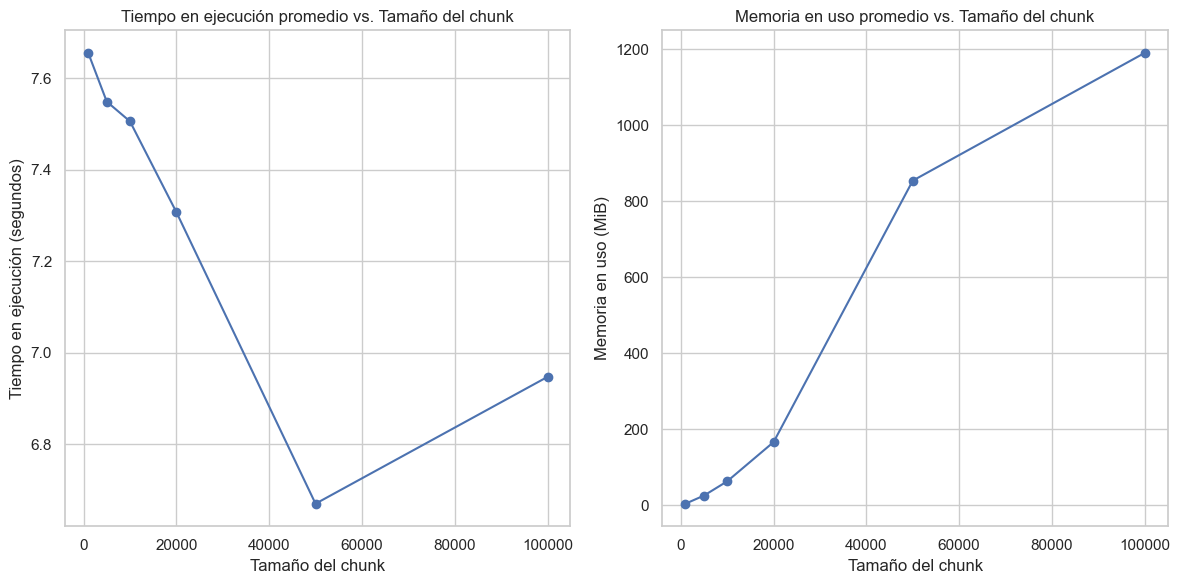

In [25]:
# Encontrar el mejor chunk basado en el tiempo
best_chunk_size = min(performance_results, key=lambda x: x[1])[0]
print(f"Mejor tamaño del chunk basado en el tiempo en ejecución promedio: {best_chunk_size}")

# Graficos de los resultados
chunk_sizes = [result[0] for result in performance_results]
execution_times = [result[1] for result in performance_results]
memory_usages = [result[2] for result in performance_results]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(chunk_sizes, execution_times, marker='o')
plt.title('Tiempo en ejecución promedio vs. Tamaño del chunk')
plt.xlabel('Tamaño del chunk')
plt.ylabel('Tiempo en ejecución (segundos)')

plt.subplot(1, 2, 2)
plt.plot(chunk_sizes, memory_usages, marker='o')
plt.title('Memoria en uso promedio vs. Tamaño del chunk')
plt.xlabel('Tamaño del chunk')
plt.ylabel('Memoria en uso (MiB)')

plt.tight_layout()
plt.show()